In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2
import random
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
Y_train = np.array(pd.read_excel('gdrive/My Drive/FYP-Data/Scene Pos/1/PositionData.xlsx')).T
print(Y_train.shape)
print(Y_train)

(1501, 3)
[[   0.            5.            1.5       ]
 [   0.            5.            1.5       ]
 [   0.            0.           10.        ]
 ...
 [  74.73719025 -124.75041962   10.        ]
 [  74.80288696 -124.81282043   10.        ]
 [  74.86858368 -124.87522125   10.        ]]


In [ ]:
X_train = np.zeros((1501,256,256,3))
vidcap = cv2.VideoCapture('gdrive/My Drive/FYP-Data/Scenes Videos/1/Basic _FirstMP4.mp4')
success, image = vidcap.read()
count = 1
while count<1501 :
  success, image = vidcap.read()
  img = cv2.resize(image, (256, 256))
  X_train[count-1,:,:,:] = np.copy(img)
  # print('Saved image ', count)
  count += 1

In [ ]:
Y_val = np.array(pd.read_excel('gdrive/My Drive/FYP-Data/Scene Pos/10/PositionData.xlsx')).T
print(Y_val.shape)
print(Y_val)
X_val = np.zeros((1501,256,256,3))
vidcap = cv2.VideoCapture('gdrive/My Drive/FYP-Data/Scenes Videos/10/Basic _FirstMP4.mp4')
success, image = vidcap.read()
count = 1
while count<1501 :
  success, image = vidcap.read()
  img = cv2.resize(image, (256, 256))
  X_val[count-1,:,:,:] = np.copy(img)
  # print('Saved image ', count)
  count += 1

(1501, 3)
[[  0.           5.           1.5       ]
 [  0.           5.           1.5       ]
 [  0.           0.          10.        ]
 ...
 [113.16665649  20.26666641  10.        ]
 [113.25        20.20000076  10.        ]
 [113.33333588  20.13333321  10.        ]]


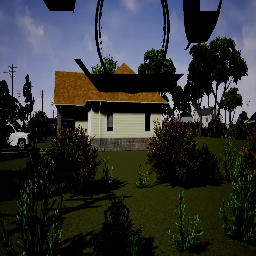

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(X_val[0,:,:,:])

In [ ]:
print(X_train.shape, Y_train.shape)

(1501, 256, 256, 3) (1501, 3)


In [ ]:
# from keras.models import Sequential
# from keras.layers import Dense, Conv2D, Flatten
# inp  = tf.keras.layers.Input((None,128,128,3), ragged=False)
# cnn = Sequential()
# cnn.add(Conv2D(8, kernel_size=16, activation='relu', input_shape=(128,128,3)))
# cnn.add(Conv2D(32, kernel_size=16, activation='relu'))
# cnn.add(Conv2D(64, kernel_size=16, activation='relu'))
# cnn.add(Flatten())
# cnn = tf.keras.applications.DenseNet169(include_top=True, 
#                                                 weights=None, 
#                                                 input_tensor=None, 
#                                                 input_shape=(128,128,3),
#                                                 pooling=None, classes=3)
# x = tf.keras.layers.TimeDistributed(cnn, input_shape=(None,128,128,3))(inp)
# x = tf.keras.layers.LSTM(8)(x)
# out = tf.keras.layers.Dense(2, activation = 'linear')(x)
# model = tf.keras.Model(inp, out)
# model.compile(loss='mse', optimizer='adam')

In [ ]:
# tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=False)

In [ ]:
# model.summary()

In [ ]:
# history = model.fit(X_train, Y_train, batch_size=64, epochs=2)

In [ ]:
# from keras.models import Sequential
# from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
# model = Sequential()
# model.add(Conv2D(8, kernel_size=16, activation='relu', input_shape=(256,256,3)))
# model.add(MaxPooling2D())
# model.add(Conv2D(32, kernel_size=16, activation='relu'))
# model.add(MaxPooling2D())
# model.add(Conv2D(64, kernel_size=16, activation='relu'))
# model.add(MaxPooling2D())
# model.add(Conv2D(128, kernel_size=16, activation='relu'))
# model.add(Flatten())
# model2 = Sequential()
# model2.add(tf.keras.layers.TimeDistributed(model, input_shape=(None, 256,256,3)))
# model2.add(tf.keras.layers.LSTM(128, return_sequences=True))
# model2.add(Dense(8, activation='linear'))
# model2.add(Dense(3, activation='linear'))
# tf.keras.utils.plot_model(model2, show_shapes=True, show_layer_names=False)

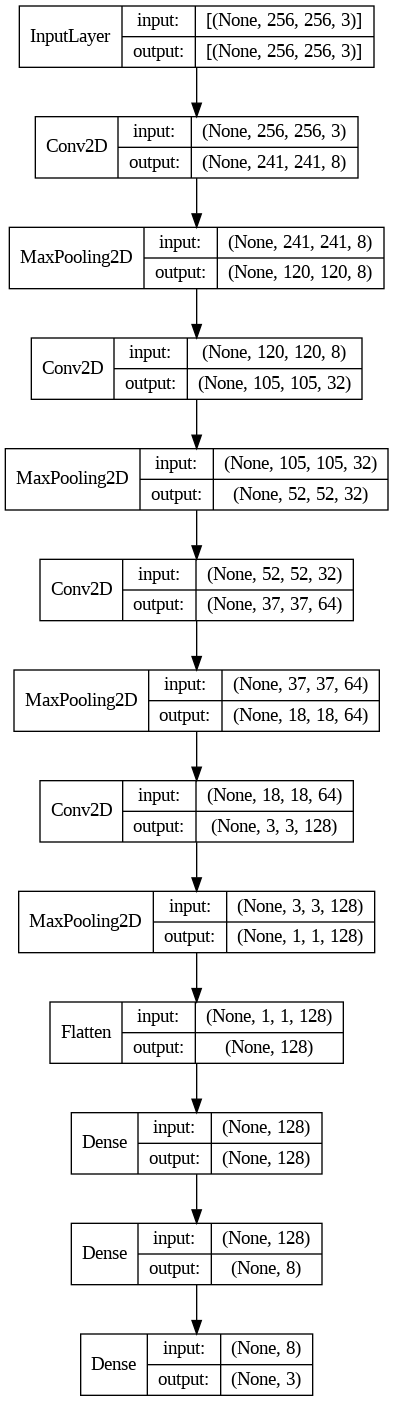

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
model2 = Sequential()
model2.add(Conv2D(8, kernel_size=16, activation='relu', input_shape=(256,256,3)))
model2.add(MaxPooling2D())
model2.add(Conv2D(32, kernel_size=16, activation='relu'))
model2.add(MaxPooling2D())
model2.add(Conv2D(64, kernel_size=16, activation='relu'))
model2.add(MaxPooling2D())
model2.add(Conv2D(128, kernel_size=16, activation='relu'))
model2.add(MaxPooling2D())
model2.add(Flatten())
model2.add(Dense(128, activation='linear'))
model2.add(Dense(8, activation='linear'))
model2.add(Dense(3, activation='linear'))
tf.keras.utils.plot_model(model2, show_shapes=True, show_layer_names=False)

In [ ]:
model2.compile(optimizer='adam', loss='mse')

In [ ]:
# model.summary()
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 241, 241, 8)       6152      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 120, 120, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 105, 105, 32)      65568     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 52, 52, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        524352    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

In [ ]:
X_train = X_train[0:1000]
Y_train = Y_train[0:1000]
X_val = X_val[0:1000]
Y_val = Y_val[0:1000]

In [ ]:
history = model2.fit(X_train, Y_train, validation_data = (X_val, Y_val), batch_size=8, epochs=25)

Epoch 1/25
125/125 [==============================] - 18s 44ms/step - loss: 12654.2412 - val_loss: 1102.4849
Epoch 2/25
125/125 [==============================] - 4s 29ms/step - loss: 265.8130 - val_loss: 1272.1506
Epoch 3/25
125/125 [==============================] - 4s 30ms/step - loss: 261.6035 - val_loss: 1122.3413
Epoch 4/25
125/125 [==============================] - 4s 33ms/step - loss: 88.3925 - val_loss: 559.7620
Epoch 5/25
125/125 [==============================] - 4s 29ms/step - loss: 5.7919 - val_loss: 573.6339
Epoch 6/25
125/125 [==============================] - 3s 25ms/step - loss: 3.8125 - val_loss: 583.6206
Epoch 7/25
125/125 [==============================] - 4s 29ms/step - loss: 1.8927 - val_loss: 663.4738
Epoch 8/25
125/125 [==============================] - 4s 30ms/step - loss: 1.4819 - val_loss: 650.0669
Epoch 9/25
125/125 [==============================] - 4s 29ms/step - loss: 1.1715 - val_loss: 622.0052
Epoch 10/25
125/125 [==============================] - 3s 25

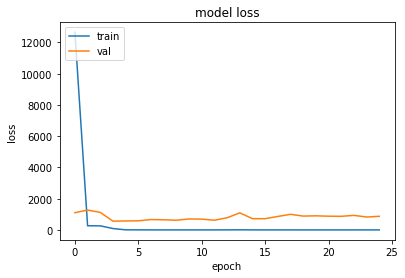

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
X_axis = range(1,1001)
print(len(X_axis))

1000


In [ ]:
Y_pred = model2.predict(X_train)

32/32 [==============================] - 2s 24ms/step


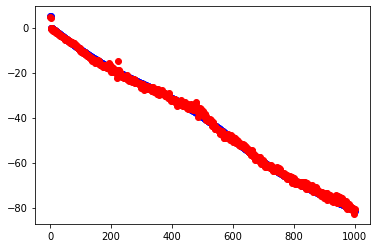

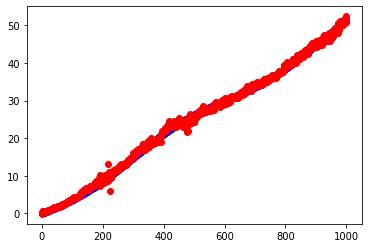

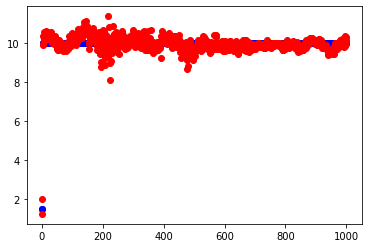

In [ ]:
plt.scatter(X_axis, Y_train[:,1], c ="blue")
plt.scatter(X_axis, Y_pred[:,1], c ="red")
plt.show()
plt.scatter(X_axis, Y_train[:,0], c ="blue")
plt.scatter(X_axis, Y_pred[:,0], c ="red")
plt.show()
plt.scatter(X_axis, Y_train[:,2], c ="blue")
plt.scatter(X_axis, Y_pred[:,2], c ="red")
plt.show()

In [ ]:
Y_pred_val = model2.predict(X_val)

32/32 [==============================] - 1s 26ms/step


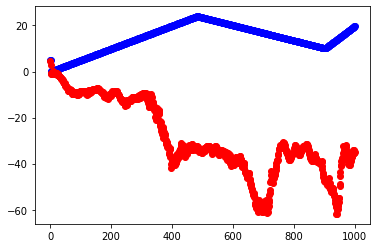

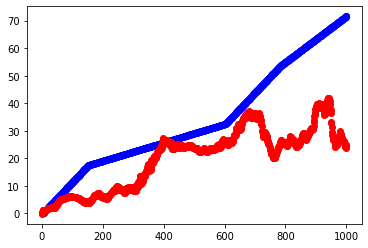

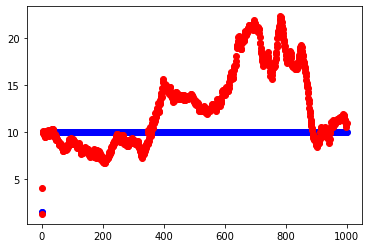

In [ ]:
plt.scatter(X_axis, Y_val[:,1], c ="blue")
plt.scatter(X_axis, Y_pred_val[:,1], c ="red")
plt.show()
plt.scatter(X_axis, Y_val[:,0], c ="blue")
plt.scatter(X_axis, Y_pred_val[:,0], c ="red")
plt.show()
plt.scatter(X_axis, Y_val[:,2], c ="blue")
plt.scatter(X_axis, Y_pred_val[:,2], c ="red")
plt.show()

In [ ]:
import pandas as pd

def write_to_file(arr, i, sttr) :
## convert your array into a dataframe
  x = arr[:, 0]
  y = arr[:, 1]
  z = arr[:, 2]
  df = pd.DataFrame({'x': x, 'y': y, 'z':z})
  ## save to xlsx file

  filepath = 'file{}{}.xlsx'.format(sttr, i)

  df.to_excel(filepath, index=False)

In [ ]:
for i in range(0,1) :
  write_to_file(Y_train, i, 'train')
  write_to_file(Y_pred, i, 'train_pred')
  write_to_file(Y_val, i, 'val')
  write_to_file(Y_pred_val, i, 'val_pred')

In [ ]:
error = np.abs(Y_pred) - np.abs(Y_train)
print(error.shape)

(1000, 3)


In [ ]:
for i in [0.01,0.1,1,10] :
  res = np.int64(np.abs(error) < i)
  print(np.sum(res), np.sum(res)/(error.shape[0]*error.shape[1]))

51 0.017
532 0.17733333333333334
2643 0.881
3000 1.0


In [ ]:
error = np.abs(Y_pred_val) - np.abs(Y_val)
print(error.shape)

(1000, 3)


In [ ]:
for i in [0.01,0.1,1,10] :
  res = np.int64(np.abs(error) < i)
  print(np.sum(res), np.sum(res)/(error.shape[0]*error.shape[1]))

5 0.0016666666666666668
54 0.018
363 0.121
1848 0.616
